In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print('pandas: ', pd.__version__)
print('matplotlib: ', matplotlib.__version__)

pandas:  1.0.5
matplotlib:  3.2.2


In [ ]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


## Questions about the data

1. What is the count of articles in each category?
2. What is the distribution of the number of categories an article belongs to?
3. What is the distribution of number of words?
4. What is the distribution of number of words for each category?
5. What are the unique characters in the text?

## Possible substitutions
- `$...$` -> MATH_FORMULA
- Everything apart from alphanumeric characters -> SCHAR

In [ ]:
# Check for missing values
df_train.isnull().sum()

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

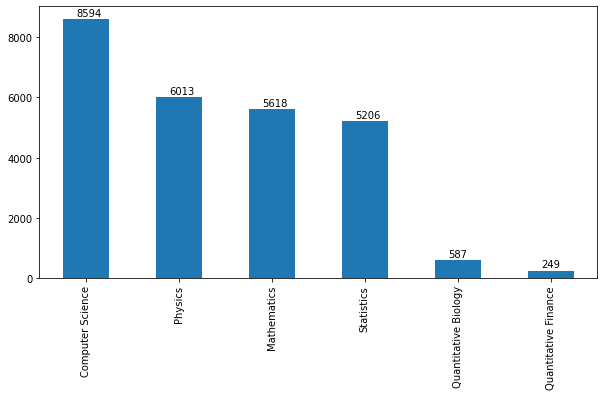

In [ ]:
# Count of articles in each category
article_count = df_train.iloc[:, 3:].sum(axis=0)
article_count.plot(kind='bar', figsize=(10, 5))
for k, v in enumerate(article_count):
    plt.text(k - 0.1, v + 100, v)
plt.show()

**Observation:** data is imbalanced.

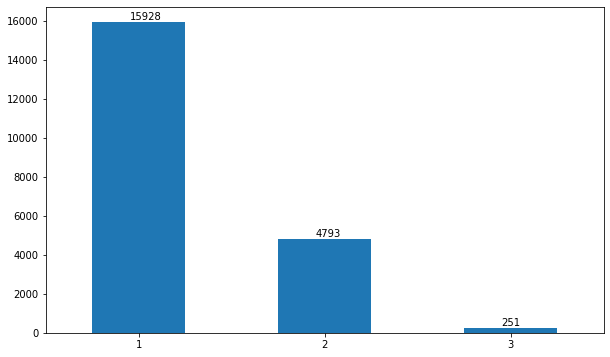

In [ ]:
# Distribution of number of categories each article belongs to
category_count = df_train.iloc[:, 3:].sum(axis=1).value_counts()
category_count.plot(kind='bar', figsize=(10, 6), rot=0)
for k, v in enumerate(category_count):
    plt.text(k - 0.05, v + 150, v)
plt.show()

**Observation:** the problem is a **multi label** classification problem

## Distribution of title and abstract lengths

<AxesSubplot:>

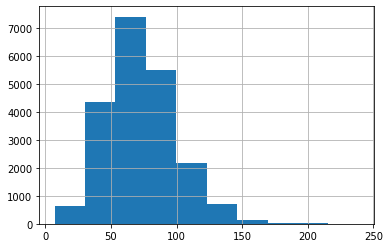

In [ ]:
df_train['TITLE'].str.len().hist()

<AxesSubplot:>

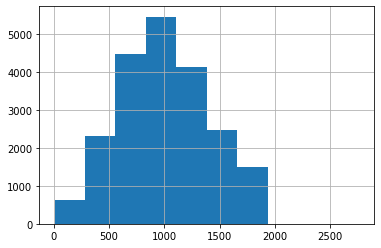

In [ ]:
df_train['ABSTRACT'].str.len().hist()

## Distribution of title and abstract lengths by class

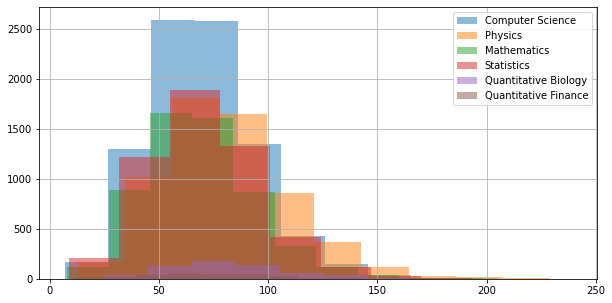

In [ ]:
for class_label in df_train.columns[3:].values:
    df_train.loc[df_train[class_label] == 1]['TITLE'].str.len().hist(alpha=0.5, label=class_label, figsize=(10, 5))
plt.legend()
plt.show()

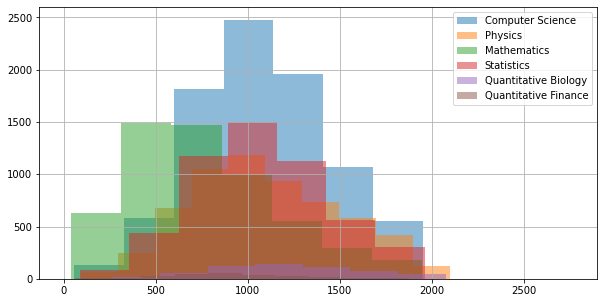

In [ ]:
for class_label in df_train.columns[3:].values:
    df_train.loc[df_train[class_label] == 1]['ABSTRACT'].str.len().hist(alpha=0.5, label=class_label, figsize=(10, 5))
plt.legend()
plt.show()

## Unique characters in dataset

In [ ]:
all_chars_title = set()
for s in df_train['TITLE'].apply(set):
    all_chars_title = all_chars_title.union(s)
print(all_chars_title)

{'ı', 'č', ':', "'", 'Å', 'h', 'ψ', '<', 'ö', 'c', 'H', '@', '3', 'Γ', 'I', 'o', 'T', 'ε', 'J', 'e', '>', 'p', 'Π', '4', 'A', 'D', 'ô', 'α', '/', 'Σ', 'δ', 'Y', 'f', 'P', 'F', 'ω', 'n', 'b', 'U', 'V', '=', 'j', 'K', 'ś', 'ě', 'ç', 'r', ' ', 'E', 'M', 'W', 'y', 'É', '{', 'σ', '^', 'Ω', '*', 'q', 'á', 'š', 'é', 'ϕ', '#', 'ø', '%', 'B', 'C', 'τ', '$', 'i', 'è', 'G', '6', '~', 'l', '?', 'm', 'ë', 'g', 'k', '`', 'ń', 'π', 'χ', 'a', '1', 'X', 'θ', 'η', 'ß', '&', '(', 'ν', 'd', ']', 's', '\\', 'ć', ')', 'w', 'à', 'ő', 'Q', 'Ü', 'μ', '2', 'Ξ', '9', 'Č', 'φ', '\x7f', 'Λ', '5', 'γ', 'Ł', 'N', 'β', 'x', '+', 'κ', 'ñ', 'O', 'L', ';', '.', 'Δ', 'Z', '8', 'ó', '}', 'ζ', '!', 'Ψ', '"', 'æ', 't', 'λ', 'ä', 'u', 'z', '|', 'ã', 'R', 'S', 'v', 'ü', 'ê', 'ï', '°', '0', '_', '-', ',', '7', '['}


In [ ]:
sorted_chars_title = list(all_chars_title)
sorted_chars_title.sort()
print(sorted_chars_title)

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '°', 'Å', 'É', 'Ü', 'ß', 'à', 'á', 'ã', 'ä', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ï', 'ñ', 'ó', 'ô', 'ö', 'ø', 'ü', 'ć', 'Č', 'č', 'ě', 'ı', 'Ł', 'ń', 'ő', 'ś', 'š', 'Γ', 'Δ', 'Λ', 'Ξ', 'Π', 'Σ', 'Ψ', 'Ω', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'κ', 'λ', 'μ', 'ν', 'π', 'σ', 'τ', 'φ', 'χ', 'ψ', 'ω', 'ϕ']


In [ ]:
all_chars_abstract = set()
for s in df_train['ABSTRACT'].apply(set):
    all_chars_abstract = all_chars_abstract.union(s)
print(all_chars_abstract)

{'Š', 'č', ':', "'", 'Å', 'h', 'ǒ', '<', 'ą', 'ö', 'c', 'H', '@', '3', 'I', 'o', 'T', 'J', 'ò', 'e', '>', 'p', '4', 'A', 'D', 'ô', '/', '÷', 'Y', 'f', 'P', 'F', 'n', 'b', 'V', 'U', '=', 'j', 'K', 'ś', 'ý', 'ě', 'ç', 'ğ', 'r', 'ę', ' ', 'M', 'E', 'W', 'y', 'É', '{', '^', '*', 'q', 'ř', 'á', 'š', 'é', '#', 'ż', '%', 'í', 'B', 'î', 'C', '$', 'Ş', 'i', 'è', 'G', '6', '~', 'l', '?', 'm', 'ë', 'g', 'k', '`', 'ń', 'ň', 'a', 'ţ', '1', 'Ö', 'X', 'ú', '&', '(', 'd', '\x99', ']', 's', '\\', 'ć', ')', 'w', 'à', '§', 'ő', 'Q', 'Ü', 'Ã', '2', 'ù', '9', 'Č', '\x94', '\x7f', '5', 'N', '\x80', 'x', '+', 'ñ', '\n', 'O', 'L', 'ž', ';', '.', 'Z', '8', 'ó', '}', '!', '"', 't', 'ä', 'u', 'z', 'ō', '|', 'ã', 'R', '†', 'S', 'v', 'â', 'ü', 'ê', 'ï', '°', 'ă', '0', '_', '-', ',', '7', '['}


In [ ]:
sorted_chars_abstract = list(all_chars_abstract)
sorted_chars_abstract.sort()
print(sorted_chars_abstract)

['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x80', '\x94', '\x99', '§', '°', 'Ã', 'Å', 'É', 'Ö', 'Ü', 'à', 'á', 'â', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'ö', '÷', 'ù', 'ú', 'ü', 'ý', 'ă', 'ą', 'ć', 'Č', 'č', 'ę', 'ě', 'ğ', 'ń', 'ň', 'ō', 'ő', 'ř', 'ś', 'Ş', 'Š', 'š', 'ţ', 'ż', 'ž', 'ǒ', '†']
